In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from itertools import chain

from utils.data_loading import load_data

In [5]:
RAW_DATA_DIR = "./data/input_data/data.csv"

contracts_df = load_data(RAW_DATA_DIR)

Total number of rows loaded: 1000
DF columns:
 id                           int32
application_date    datetime64[ns]
contracts                   object
dtype: object


# Dataset EDA

The following section contains brief exploratory analysis. Main purpose of it is to understand structure of data provided and gain insignts useful to futher feature engineering.  

## `ID` Column: 

Main aspects explored related to `id` column of initial dataset:
1. Number of unique values.
2. Number of empty values.

In [11]:
print(f"Total id count: {len(contracts_df['id'])}")
print(f"Non-empty id count: {contracts_df['id'].count()}")
print(f"Number of unique ids: {contracts_df['id'].nunique()}")

Total id count: 1000
Non-empty id count: 1000
Number of unique ids: 1000


## `APPLICATION_DATE` Column:

Main aspects explored about `application_date` column of initial dataset:
1. Number of unique values.
2. Number of empty values.
3. Min / Max values.
4. General statistics.

In [14]:
print(f"Total id count: {len(contracts_df['application_date'])}")
print(f"Non-empty application date count: {contracts_df['application_date'].count()}")
print(f"Number of unique application dates: {contracts_df['application_date'].nunique()}")

Total id count: 1000
Non-empty application date count: 1000
Number of unique application dates: 726


In [15]:
contracts_df['application_date'].describe()

count                             1000
mean     2024-02-13 05:05:57.326557696
min         2024-02-12 19:22:46.652000
25%      2024-02-13 04:49:46.504750080
50%      2024-02-13 05:25:54.995999744
75%      2024-02-13 05:46:55.790749952
max         2024-02-13 06:10:00.403000
Name: application_date, dtype: object

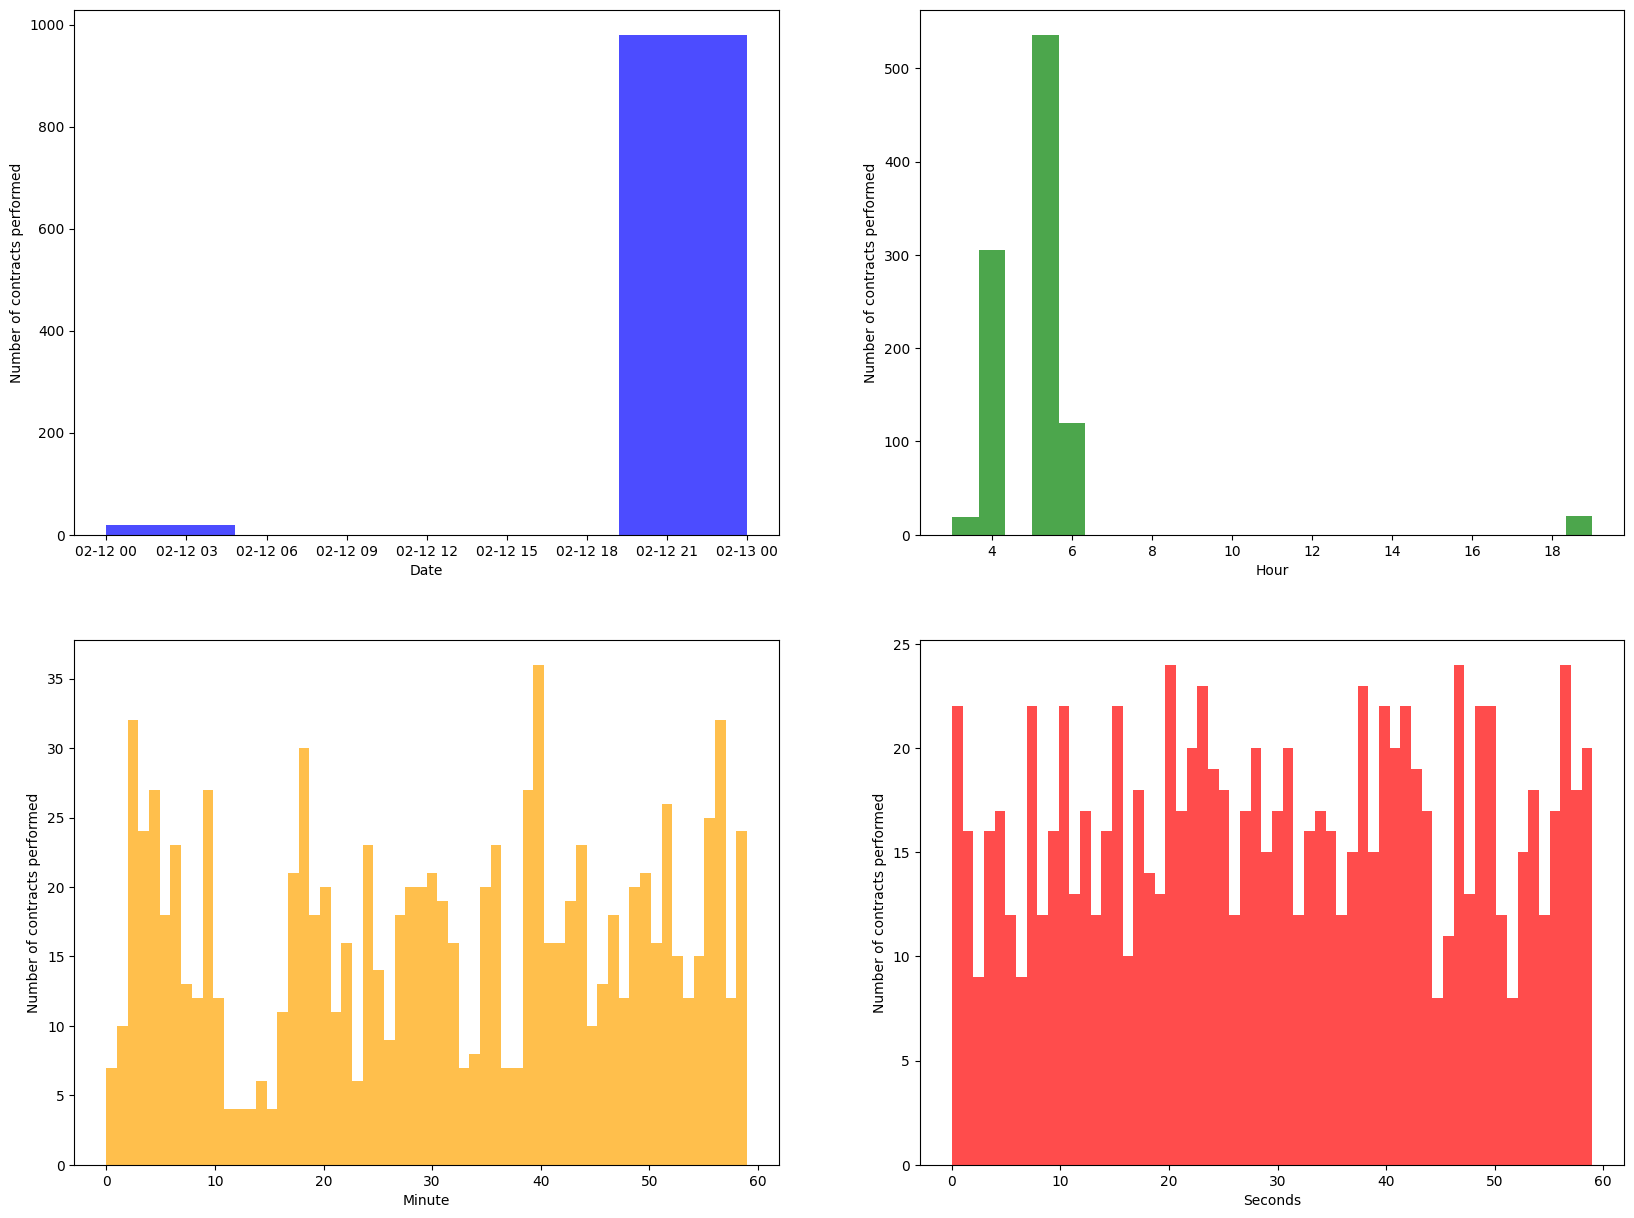

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

ax[0, 0].hist(contracts_df['application_date'].dt.date, bins=5, alpha=0.7, color='blue')
ax[0, 0].set_ylabel('Number of contracts performed')
ax[0, 0].set_xlabel('Date')

ax[0, 1].hist(contracts_df['application_date'].dt.hour, bins=24, alpha=0.7, color='green')
ax[0, 1].set_ylabel('Number of contracts performed')
ax[0, 1].set_xlabel('Hour')

ax[1, 0].hist(contracts_df['application_date'].dt.minute, bins=60, alpha=0.7, color='orange')
ax[1, 0].set_ylabel('Number of contracts performed')
ax[1, 0].set_xlabel('Minute')

ax[1, 1].hist(contracts_df['application_date'].dt.second, bins=60, alpha=0.7, color='red')
ax[1, 1].set_ylabel('Number of contracts performed')
ax[1, 1].set_xlabel('Seconds')

plt.show()

## `CONTRACTS` Column:

Main aspects explored related to `contracts` column of initial dataset:
1. Number of empty values.
2. Number of claims per `id`.
3. Presence of compound JSON claims.
4. Content and keys of JSON claims.
5. Number of empty values per each JSON key.

In [40]:
print(f"Total id count: {len(contracts_df['contracts'])}")
print(f"Non-empty contracts count: {contracts_df['contracts'].count()}")

Total id count: 1000
Non-empty contracts count: 495


In [45]:
contracts_df['number_of_contracts'] = contracts_df['contracts'].apply(
    lambda c: len(c) if c else None
)

contracts_df['number_of_contracts'].describe()

count    495.000000
mean      18.727273
std       43.650855
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max      378.000000
Name: number_of_contracts, dtype: float64

<Axes: xlabel='Number of claims in `contract` field', ylabel='Count frequency'>

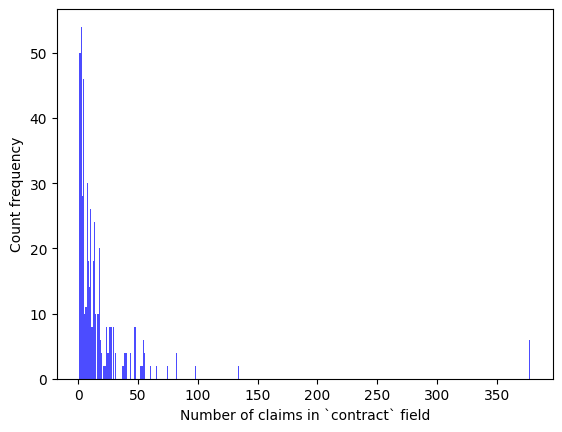

In [50]:
contracts_df['number_of_contracts'].plot(
    kind='hist', 
    bins=378, 
    alpha=0.7, 
    color='blue', 
    xlabel='Number of claims in `contract` field', 
    ylabel='Count frequency'
)

In [61]:
json_values_data_types = set()
json_keys = dict()

def get_json_data_types(claim_json: dict) -> None:
    for k, v in claim_json.items(): 
        value_type = type(v)
        if k not in json_keys.keys():
            json_keys[k] = set([value_type])
        else:
            json_keys[k].add(value_type)
        json_values_data_types.add(value_type)

_ = contracts_df['contracts'].apply(lambda x: [get_json_data_types(claim_js) for claim_js in x] if x else None)

print(f"JSON keys present:")
pprint(json_keys)
print(f"JSON values data types:\n {json_values_data_types}\n")

JSON keys present:
{'bank': {<class 'str'>},
 'claim_date': {<class 'datetime.datetime'>},
 'claim_id': {<class 'str'>, <class 'int'>},
 'contract_date': {<class 'NoneType'>, <class 'datetime.datetime'>},
 'contract_id': {<class 'NoneType'>, <class 'str'>, <class 'int'>},
 'loan_summa': {<class 'NoneType'>, <class 'int'>},
 'summa': {<class 'NoneType'>, <class 'int'>}}
JSON values data types:
 {<class 'NoneType'>, <class 'datetime.datetime'>, <class 'str'>, <class 'int'>}



In [69]:
all_claims = contracts_df['contracts'].dropna().to_list()
all_claims = list(chain.from_iterable(all_claims))

claims_df = pd.DataFrame(all_claims)
claims_df.head(10)

,contract_id,bank,summa,loan_summa,claim_date,claim_id,contract_date
0,522530,003,500000000.0,0.0,2020-02-13,609965,2020-02-17
1,None,014,NaN,NaN,2020-08-28,F00013731,NaT
2,None,014,NaN,NaN,2020-10-08,F00021301,NaT
3,None,014,NaN,NaN,2020-11-25,F00037907,NaT
4,None,053,NaN,NaN,2020-12-09,34852,NaT
5,35163,053,510000000.0,0.0,2020-12-15,35163,2020-12-21
6,None,014,NaN,NaN,2021-01-26,F00058018,NaT
7,None,014,NaN,NaN,2021-07-08,F00125905,NaT
8,None,062,NaN,NaN,2021-07-12,1535899,NaT
9,None,062,NaN,NaN,2021-07-19,1573562,NaT


In [82]:
print(f"Total number of all claims: {len(claims_df)}")
claims_df.describe().T

Total number of all claims: 9270


,count,mean,min,25%,50%,75%,max,std
summa,1924.0,1307146012.037422,1150900.0,200000000.0,405000000.0,1000000000.0,32700000000.0,3300369363.07668
loan_summa,1742.0,581756333.504592,0.0,0.0,0.0,99935325.0,32700000000.0,2868316465.136437
claim_date,9270,2022-11-18 08:52:11.650485504,2008-10-28 00:00:00,2022-06-05 00:00:00,2023-06-29 00:00:00,2023-12-13 00:00:00,2024-02-13 00:00:00,NaN
contract_date,1924,2022-03-11 18:00:44.906444800,2016-09-24 00:00:00,2021-03-14 00:00:00,2022-09-12 00:00:00,2023-08-15 00:00:00,2024-02-13 00:00:00,NaN


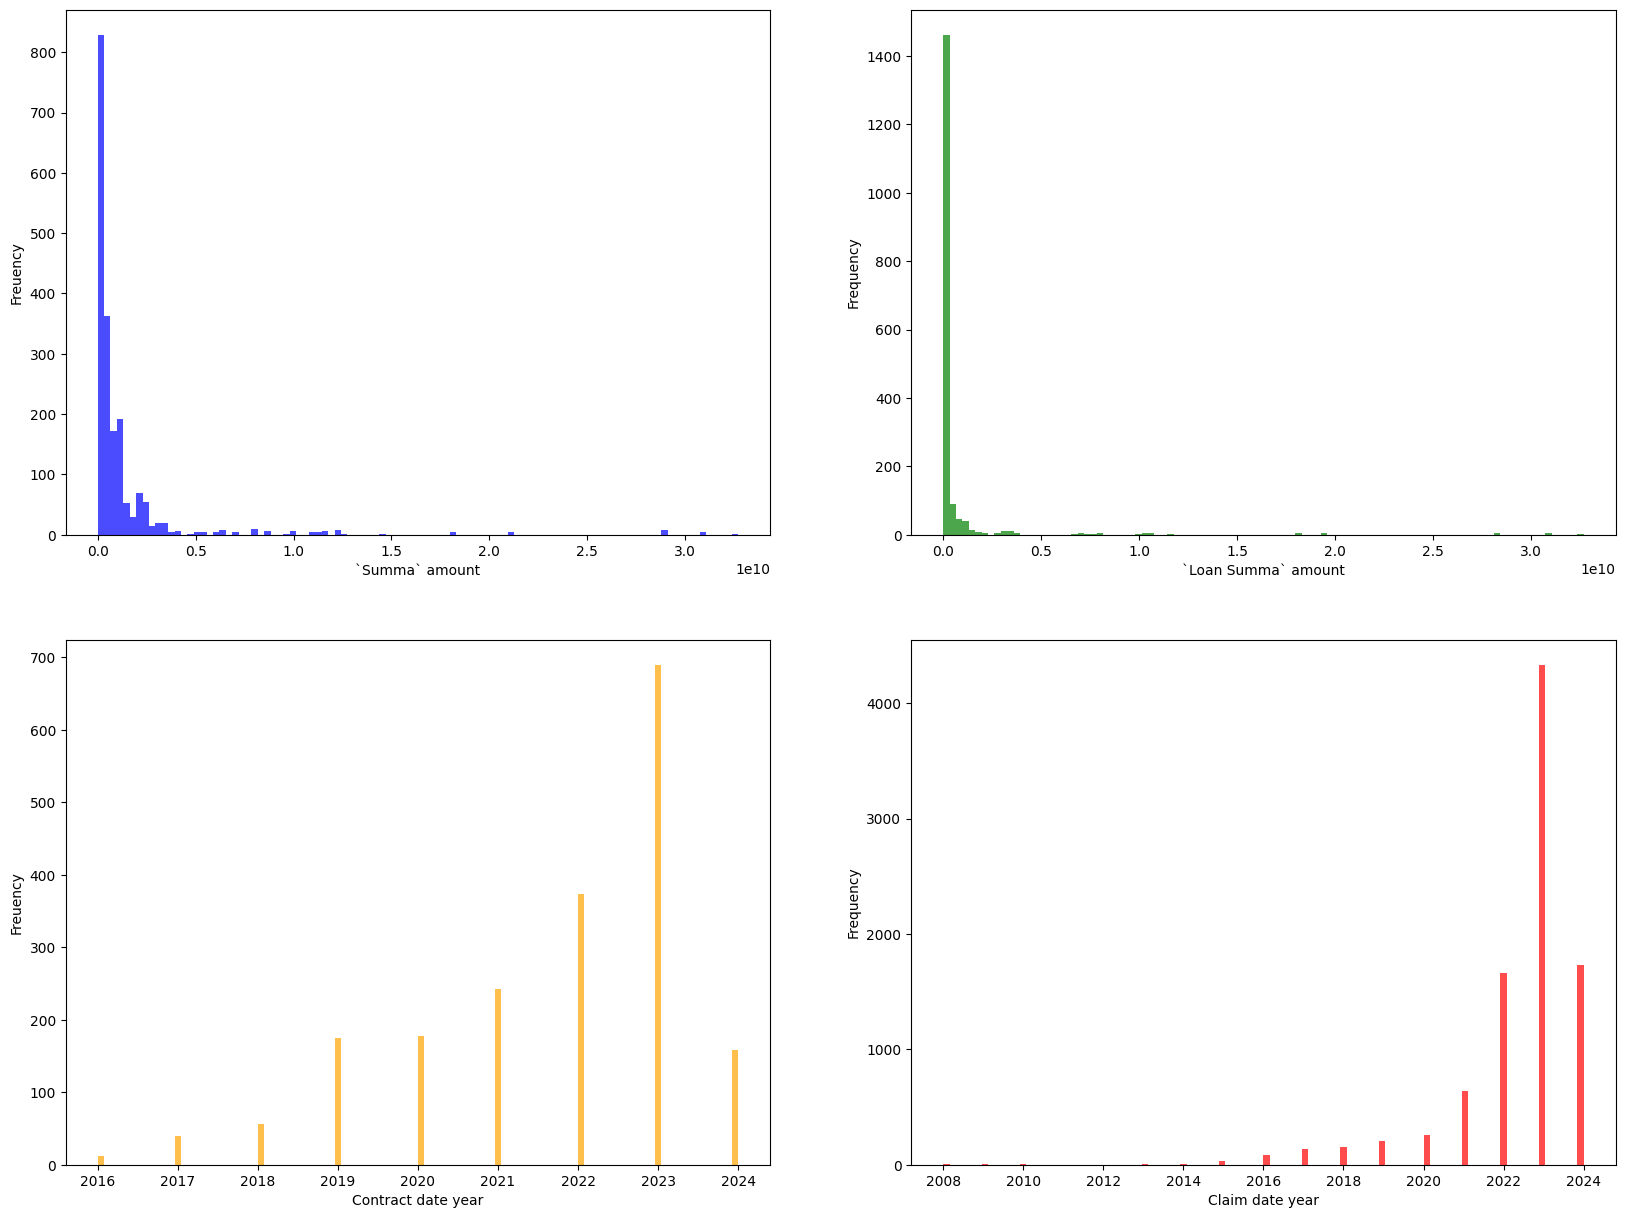

In [80]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))

ax[0, 0].hist(claims_df['summa'], bins=100, alpha=0.7, color='blue')
ax[0, 0].set_ylabel('Freuency')
ax[0, 0].set_xlabel('`Summa` amount')

ax[0, 1].hist(claims_df['loan_summa'], bins=100, alpha=0.7, color='green')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_xlabel('`Loan Summa` amount')

ax[1, 0].hist(claims_df['contract_date'].dt.year, bins=100, alpha=0.7, color='orange')
ax[1, 0].set_ylabel('Freuency')
ax[1, 0].set_xlabel('Contract date year')

ax[1, 1].hist(claims_df['claim_date'].dt.year, bins=100, alpha=0.7, color='red')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_xlabel('Claim date year')

plt.show()

# Summary:

1. Initial dataset contains 1000 rows with non-empty unique `id` and `application_date` columns.
2. Data was collected within narrow time-period (~10 hours from 12/02 till 13/02).
3. `contracts` column contains array of claims plain JSON with fixed structure and fields.
4. Mean number of claims JSONs per `id` is 18 with one outlier containing 378 claims.
5. Total number of claims JSONs is 9270.
6. Claims dates are from period between 215 and 2024.
7. Contracts dates are from period between 2016 and 2024.
8. No anomailes in data distribution or its content were found.